To predict stock returns over the next two days, we will use the XGBoost regressor. There were not many notebooks here. Feel free to remove this note if it is inappropriate.

Among the key ideas in this work are:  

(1) Using XGBoost to select the ten most important features,  

Using a linear loss function instead of a square loss function.

The final model consistently outperforms the all-zero prediction. Moreover, the model could rank 30th on the private leaderboard in my test as well, outperforming the median prediction.

# Data Visualization and Feature Analysis

We load and visualize the data in the section. We also analyze the correlations between the features.

To load the zipped data, we use the zipfile package. The training data are loaded into a DataFrame in Pandas.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile

zip_file = ZipFile('../input/the-winton-stock-market-challenge/train.csv.zip')
df = pd.read_csv(zip_file.open('train.csv'))
df.head()

Id  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1        NaN        NaN        NaN        NaN        8.0        NaN   
1   2        NaN        NaN        NaN        NaN        3.0   0.388896   
2   3        NaN  -0.696727   0.739591  -0.167928        9.0   0.471947   
3   4        NaN  -0.694350   1.568248   0.479073        5.0   0.120653   
4   5        6.0  -1.736489   2.765531   1.245280        7.0   4.866985   

   Feature_7  Feature_8  Feature_9  ...   Ret_175   Ret_176   Ret_177  \
0      75751     0.2254       11.0  ... -0.002688  0.002246 -0.000838   
1      17369     0.0166       13.0  ... -0.000129  0.000123  0.000248   
2       8277     0.3650        9.0  ... -0.000524 -0.000394  0.000116   
3      22508     0.2654       13.0  ...  0.000346 -0.000090  0.000288   
4      22423     0.2138       13.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 211 columns]

Several libraries are imported (numpy, pandas, tensorflow, and matplotlib) that are commonly used in data analysis and machine learning.

It then imports the ZipFile class from the zipfile module. Zip files are handled by this class.

A ZipFile object is then created, specifying the path to a zip file called "train.csv.zip" located in the directory "../input/the-winton-stock-market-challenge/".

The file "train.csv" inside the zip file is opened using the open method of the ZipFile instance.

To read the contents of the "train.csv" file into a pandas DataFrame, it uses the read_csv function from the pandas library. DataFrame is assigned to variable df.

In the end, the code shows a preview of the first few rows of the DataFrame using the head method.

The testing data are also loaded to a DataFrame in Pandas.

In [2]:
zip_file = ZipFile('../input/the-winton-stock-market-challenge/test_2.csv.zip')
new_df = pd.read_csv(zip_file.open('test_2.csv'))
new_df.head()

Id  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1        1.0   1.412783  -0.056284        NaN       10.0   0.413226   
1   2        NaN        NaN   0.907973   1.002425        7.0  -0.257825   
2   3        NaN  -0.607583   1.076668   0.517865        5.0   0.947340   
3   4        NaN   2.230240   0.223222        NaN        1.0        NaN   
4   5        NaN   0.360399   0.597896  -0.145497       10.0   0.275744   

   Feature_7  Feature_8  Feature_9  ...   Ret_111   Ret_112   Ret_113  \
0      18871     0.2138       11.0  ...  0.000370 -0.000762       NaN   
1       5852     0.2138       13.0  ...  0.000457  0.000003 -0.000007   
2      76935     0.0105       10.0  ...  0.000003  0.000157 -0.000181   
3      84573     0.3318       13.0  ...  0.000010 -0.000792 -0.000479   
4      89615     0.0099        8.0  ...  0.000447  0.000489 -0.000233   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000366 -0.002444 -0.001301 -0.000917  0.000762 -0.000556  0.000759  
1 -0.000003 -0.000012 -0.000463 -0.000003 -0.000002  0.000468 -0.000012  
2  0.000003       NaN  0.000164  0.000353  0.000704 -0.000168 -0.000006  
3  0.000017  0.000170 -0.001079  0.000320  0.000006  0.001392 -0.001850  
4 -0.000495  0.000057 -0.000050 -0.000011 -0.000377  0.000227 -0.000114  

[5 rows x 147 columns]

In this code, we have a zip file and a CSV file that differ from the previous one.

In the first step, it creates a new instance of the ZipFile class, specifying a path to a zip file called "test_2.csv.zip" in the directory "../input/the-winton-stock-market-challenge".

It opens the file "test_2.csv" inside the zip file using the open method of the ZipFile instance.

Next, it reads the contents of the "test_2.csv" file into a new pandas DataFrame using the read_csv function in the pandas library. DataFrame new_df contains the DataFrame.

The code displays the first few rows of the DataFrame using the head method, showing a preview of the "test_2.csv" file's data.

Most of the columns contain missing values. Below are the top ten features with the most missing values.

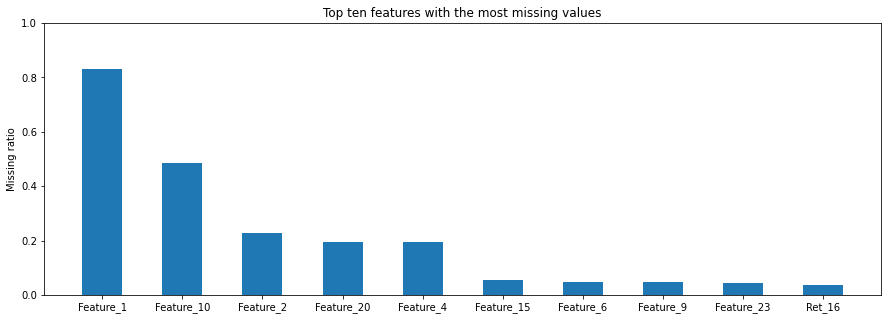

In [3]:
fig, ax = plt.subplots(figsize = (15, 5))
df_na = (df.isnull().sum() / len(df))
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)[: 10]
ax.bar(range(df_na.size), df_na, width = 0.5)
plt.xticks(range(df_na.size), df_na.index, rotation = 0)
plt.ylim([0, 1])
plt.title('Top ten features with the most missing values')
plt.ylabel('Missing ratio')
plt.show()

Using the matplotlib library, this code creates a bar chart to visualize the missing values in a DataFrame.

The first step is to create a figure (fig) and axes object (ax) using the subplots function. By setting figsize to 15, the figure will be 15 units wide and 5 units tall.

Then, it divides the sum of null values by the total number of rows to calculate the proportion of missing values in each column. The Series resulting from isnull().sum() / len(df) is assigned to df_na.

By using df_na[df_na == 0].index, it drops the columns from df_na where the missing value ratio is zero. Sort_values(ascending = False) sorts the remaining values in descending order, and the top ten values are chosen by [: 10]. Df_na remains associated with the resulting Series.

A bar chart is then plotted using ax.bar. Bar x-coordinates are provided by range(df_na.size), bar heights are provided by df_na, and the bar width is specified by width = 0.5.

A rotation angle of 0 degrees is specified by rotation = 0 in the plt.xticks function, which labels the x-axis tick marks with df_na's index.

The y-axis is limited between 0 and 1 by plt.ylim([0, 1]).

PLT.title is used to add a title to the chart, plt.ylabel is used to set the y-axis label, and plt.show() is used to show the chart. On the y-axis, the chart shows the top ten features in the DataFrame that have the most missing values.

Time series of stock returns are extracted from independent variables on a minute-by-minute basis. For this time series data, I initially used a Recurrent Neural Network (RNN), but the RNN was prone to significant overfitting. I decided to aggregate all the returns in the time series, creating a single feature reflecting the stock return for today's first two hours.

Parallel to this, I experimented with a variety of models to forecast intra-day stock returns. In spite of this, none of the predictions outperformed a simple all-zero prediction. Considering that our goal is only to predict the stock return for the next minute, this makes sense. Fresh data can be added to our model every minute. Therefore, I will use the all-zero prediction for intra-day stock returns, focusing on the two days that follow.

In [4]:
ret = df.loc[:, 'Ret_2':'Ret_120'].sum(1)
new_ret = new_df.loc[:, 'Ret_2':'Ret_120'].sum(1)

X = np.hstack((df.loc[:, 'Feature_1':'Ret_MinusOne'].values, ret.values[:, np.newaxis]))
ts = df.loc[:, 'Ret_2':'Ret_120'].values
y = df.loc[:, 'Ret_PlusOne':'Ret_PlusTwo'].values
y_ts = df.loc[:, 'Ret_121':'Ret_180'].values

new_X = np.hstack((new_df.loc[:, 'Feature_1':'Ret_MinusOne'].values, new_ret.values[:, np.newaxis]))
new_ts = new_df.loc[:, 'Ret_2':'Ret_120'].values

This code performs a series of operations, simplistically explained as follows:

Within the DataFrame df, the first step is to calculate the sum of values across the columns marked 'Ret_2' through 'Ret_120', with the result stored in a variable named ret. A similar operation is then performed on the DataFrame new_df, summing the values of each row across the 'Ret_2' to 'Ret_120' columns and storing the results in the new_ret variable.

The code then merges the values from columns 'Feature_1' and 'Ret_MinusOne' in df with the values in the ret variable. A variable named X holds the combined values of the amalgamation, which is done using np.hstack.

The next step involves extracting values from the 'Ret_2' to 'Ret_120' columns in df and storing them in a variable known as ts. A variable named y is used to store values from columns 'Ret_PlusOne' and 'Ret_PlusTwo' in df. Further, a variable called y_ts is used to store values from the 'Ret_121' to 'Ret_180' columns in df.

The code combines the values from the 'Feature_1' and 'Ret_MinusOne' columns in new_df with the values in new_ret using np.hstack. Resulting combinations are stored in a variable named new_X.

A new_ts variable is created by extracting values from new_df's 'Ret_2' to 'Ret_120' columns.

In general, these operations involve manipulation and extraction of data. In subsequent analyses or modeling, the newly created variables will be used.

The missing values are imputed using the mean of the independent variables since we do not know what those variables stand for. It may be possible to find better imputation methods if we knew the meaning of those independent variables in the real world.

In [5]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(strategy = 'mean')
X = imr.fit_transform(X)
new_X = imr.transform(new_X)

ts = imr.fit_transform(ts)
new_ts = imr.transform(new_ts)

This code uses the Scikit-Learn SimpleImputer class to perform a series of operations, which can be explained as follows:

Import the SimpleImputer class, which handles missing values in datasets. In the following step, a class instance is created and its 'strategy' parameter is set to 'mean'. Hence, the mean value of the corresponding feature will fill any missing values.

Using the fit_transform method, the instance of SimpleImputer is applied to array X. The mean value of the corresponding feature is substituted for any missing values within X.

Using the transform method of the SimpleImputer instance, this process is repeated with the array new_X. Using the mean values calculated from the X array, missing values in new_X are replaced with the mean value of their respective features.

Similarly, the fit_transform method of the SimpleImputer instance is applied to the ts array. In this operation, any missing values in ts are replaced with their mean values.

New_ts is transformed using the same transform method as new_X. In this case, missing values in new_ts are replaced with their respective feature's mean value, calculated based on the ts array's mean values.

Using the mean value of each feature, the code fills in any missing values within the given arrays (X, new_X, ts, new_ts). As a result, the data can be analyzed or modeled later if it is complete.

Below are three instances of the stock return time series within the first 120 minutes of the current day. Stocks exhibit greatly varying behaviors, as is evident. By analyzing these time series, one can gain invaluable insights into the volatility of these stocks, which is extremely helpful when pricing stock options.

In spite of this, the details contained in the time series tend to be too noisy to be able to accurately predict average stock returns. Instead, we aggregate the returns within the time series, representing them as a single feature.

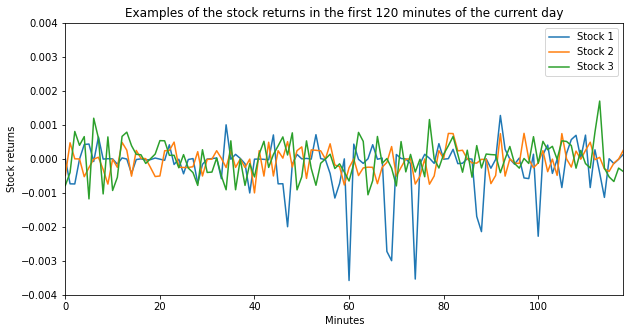

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(ts[0, :], label = 'Stock 1')
plt.plot(ts[1, :], label = 'Stock 2')
plt.plot(ts[2, :], label = 'Stock 3')
plt.ylim([-0.004, 0.004])
plt.xlim([0, 118])
plt.ylabel('Stock returns')
plt.xlabel('Minutes')
plt.title('Examples of the stock returns in the first 120 minutes of the current day')
plt.legend()
plt.show()

The code generates a line plot using matplotlib by performing the following sequence of operations:

In the first step, a figure will be created (named 'fig') and an axes object will be created (named 'ax') using the subplots function. It has a width of 10 units and a height of 5 units, defined by the figsize parameter.

Next, a line graph representing the returns of the first stock is plotted using plt.plot. A ts array is used for this (ts[0, :]). By using the label parameter, this line will have a label for the legend.

The code then plots another line graph to represent the returns of the second stock. In the ts array, this line corresponds to row 2 (ts[1, :]). A third line graph is plotted for the third row (ts[2, :]) of the ts array, which represents the third stock's returns.

To display values between -0.004 and 0.004, the plt.ylim function is used. Additionally, values ranging from 0 to 118 are displayed using plt.xlim.

Using plt.ylabel, the y-axis label indicates that the values represent "Stock returns". Additionally, the x-axis label is set to "Minutes" using plt.xlabel. Plot.title describes the content as "Examples of the stock returns in the first 120 minutes of the day".

With plt.legend, each stock's line is differentiated by a legend. Using plt.show(), the plot is displayed.

The resulting plot illustrates the stock returns over time for three different stocks, enabling an analysis of their respective patterns and fluctuations during the first 120 minutes of the current day.

The correlations between various features in the data are illustrated. Independent variables exhibit strong interrelationships. In the next two cells, this aspect will be further discussed. A negligible correlation is also observed between the target variables and the independent features. Based on this, we might have difficulty surpassing basic predictions, such as the all-zero and median predictions.

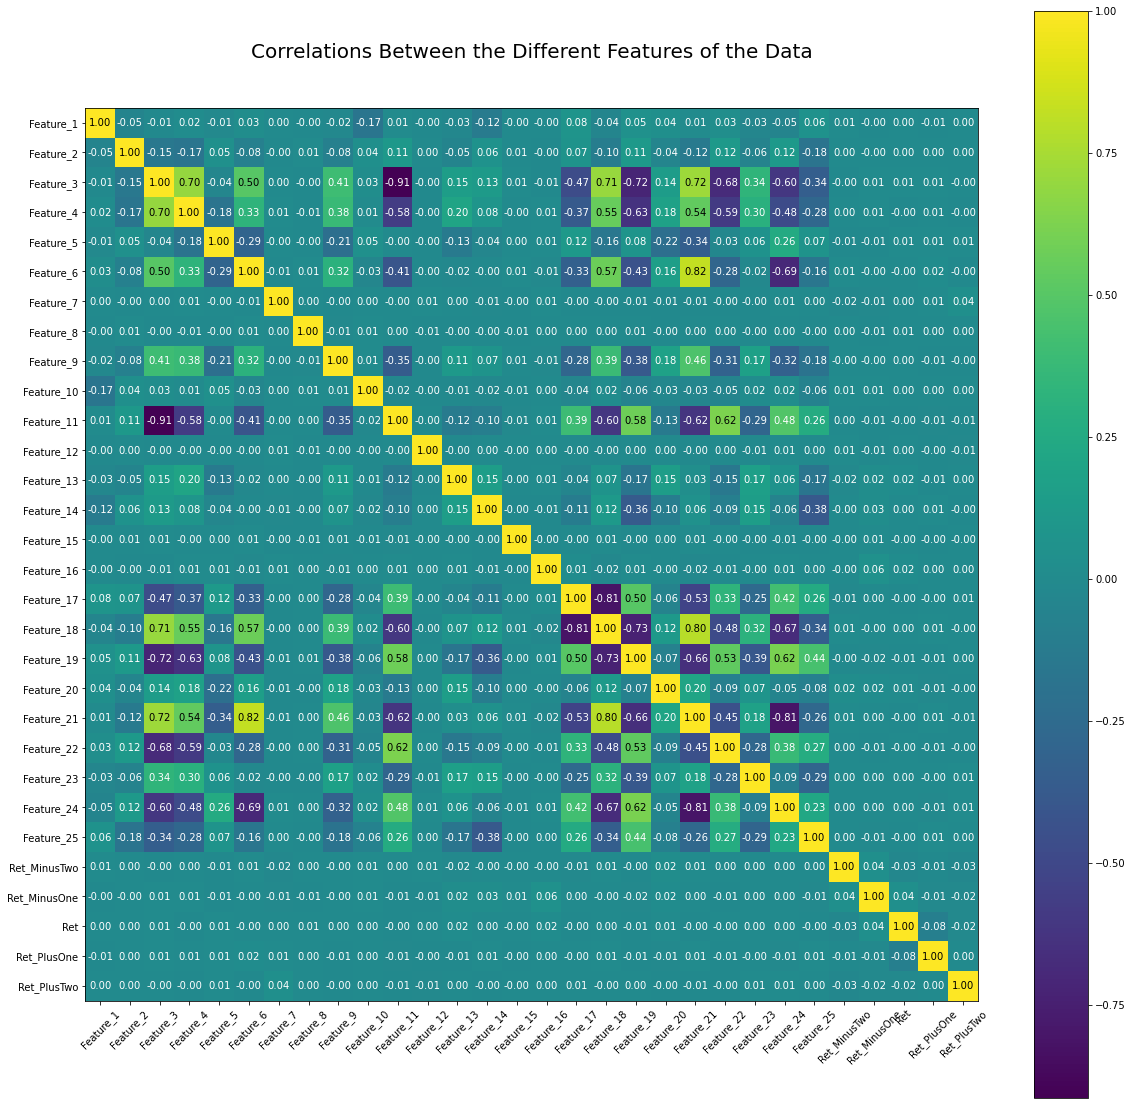

In [7]:
---

To construct a correlation heatmap using the mlxtend library, the code executes a series of operations as follows:

In the first stage of the code, the heatmap function is imported from the mlxtend library's plotting module. As a result, the np.corrcoef function is used to compute the correlation matrix (referred to as 'cm'). In this matrix, the input features are stacked and the output labels are transposed.

Following this, 'cols', or column names, are created. The list combines the columns in df from index 1 to 28 and adds three labels: 'Ret', 'Ret_PlusOne', and 'Ret_PlusTwo'. Output labels are represented by these extra labels.

A heatmap function is then invoked with the correlation matrix (cm) as the primary data. In addition to the row_names parameter, it defines the column_names parameter as well. Figsize sets the size of the resultant heatmap to 20 units by 20 units.

Using plt.title, the plot's title is "Correlations Between the Different Features of the Data"; the fontsize is 20. Using plt.show(), the plot is displayed.

The end result is a heatmap that depicts the correlations between different data features. Each row and column represents a feature, while each cell represents the strength and direction of the correlation between those features. The dataset can then be analyzed for patterns and relationships easily.

Here is an example of a strong correlation between two independent variables.

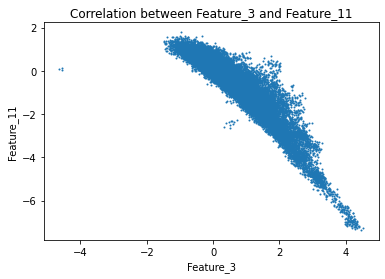

In [8]:
plt.scatter(df['Feature_3'], df['Feature_11'], marker = 'o', s = 1) #, linewidth = 1, edgecolor = 'black')
plt.title('Correlation between Feature_3 and Feature_11')
plt.xlabel('Feature_3')
plt.ylabel('Feature_11')
plt.show()

A scatter plot is generated by using matplotlib by executing the following sequence of operations:

To plot a scatter graph, the plt.scatter function is used. DataFrame df 'Feature_3' column provides the x-axis values, while 'Feature_11' provides the y-axis values. A circular marker is utilized by setting the marker parameter to 'o', and its size is specified by setting the s parameter to 1.

The title of the plot is set using plt.title, labeling the content as "Correlation between Feature_3 and Feature_11". Using plt.xlabel, a label will be displayed on x-axis indicating that "Feature_3" represents the values. Additionally, the plt.ylabel function is used to indicate "Feature_11" on the y-axis.

Plot.show() is used to display the plot.

'Feature_3' and 'Feature_11' are plotted in a scatter plot to show their relationship. The data points are represented by small, circular markers. Each marker's x-axis position corresponds to 'Feature_3', and its y-axis position corresponds to 'Feature_11'. Using this scatter plot, it is possible to visually analyze any correlation or patterns between these two features.

It is possible to disentangle independent variables using Principal Component Analysis (PCA). A PCA example is presented below. As a result, I have found that the application of PCA tends to degrade the performance of our model in this context. This is likely due to the fact that many independent variables cannot be used to predict future stock returns. In PCA, we combine both useful and irrelevant independent variables, resulting in a decline in the performance of our model. In this case, we have decided not to use PCA.

In [9]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

#scaler = StandardScaler()
#X[:, :25] = scaler.fit_transform(X[:, :25])
#pca = PCA(n_components = 25)
#X[:, :25] = pca.fit_transform(X[:, :25])

The data are split into training data, validation data, and testing data. From the discuss section of this Challenge, we know the Feature_7 is closely related to the time. Therefore, we do not use cross-validation or random splitting here. Otherwise, future information will leak into the training data, and we will get a model that performs very good on the training data but is not useful in predicting future unseen data.

In [10]:
X_train = X[:30000, :]
X_val = X[30000:35000, :]
X_test = X[35000:, :]
y_train = y[:30000, :]
y_val = y[30000:35000, :]
y_test = y[35000:, :]
X_train_val = X[:35000, :]
y_train_val = y[:35000, :]

In order to divide the data into different subsets, the code performs several operations:

It assigns the initial 30,000 rows of the array X to the variable X_train, which serves as the training data. In the next step, rows 30,000 to 35,000 (excluding the 35,000th row) of the array X are assigned to the variable X_val, which represents the validation data. As a result, rows beginning with the 35,000th row of the array X are allocated to the variable X_test, which represents the test data.

Similarly, the first 30,000 rows of the array y are assigned to the variable y_train, which represents the target labels. As the target labels for the validation data, rows 30,000 to 35,000 (excluding the 35,000th row) of the array y are assigned to the variable y_val. As of the 35,000th row of the array y, the variable y_test represents the target labels for the test data.

In addition, the initial 35,000 rows of array X are designated to the variable X_train_val, symbolizing the consolidated training and validation data. The first 35,000 rows of array y are assigned to the variable y_train_val, which represents the combined target labels for training and validation.

These operations successfully partition the original dataset (X and Y) into training, validation, and testing subsets. The training set contains the first 30,000 rows, the validation set comprises the rows 30,000 to 35,000, and the test set includes the rows beginning with the 35,000th row. A combined training and validation dataset (X_train_val and Y_train_val) encompasses the first 35,000 rows of the original dataset.

The stock returns in the following two days are split to two target variables.

In [11]:
y1_train = y_train[:, 0]
y2_train = y_train[:, 1]
y1_val = y_val[:, 0]
y2_val = y_val[:, 1]
y1_test = y_test[:, 0]
y2_test = y_test[:, 1]
y1_train_val = y_train_val[:, 0]
y2_train_val = y_train_val[:, 1]
y1 = y[:, 0]
y2 = y[:, 1]

Several operations are performed to isolate specific columns from the target label arrays, including y_train, y_val, y_test, y_train_val, and y:

A variable y1_train represents the target labels for the first output by assigning the data from the initial column of the y_train array. For the second output, the information from the second column of the y_train array is allocated to the variable y2_train.

Y1_val indicates the target labels for the first output in the validation set based on the values assigned to the first column of the array y_val. For the second output in the validation set, the data from the second column of the y_val array is assigned to the variable y2_val.

The code assigns the target labels for the first output of the test set to the variable y1_test, from the first column of the y_test array. A variable y2_test is assigned the values from the second column of the y_test array, which represent the target labels for the second output.

In the combined training and validation set, the values in the first column of the y_train_val array are assigned to the variable y1_train_val. In the combined training and validation set, the target labels for the second output are represented by the variable y2_train_val.

A variable y1 indicates the target labels for the first output in the original dataset, based on values from the first column of the y array. For the second output in the original dataset, the values from the second column of the y array are allocated to the variable y2.

By isolating specific columns from target label arrays, individual analysis and modeling are possible. In the training set, y1_train contains the target labels for the first output, while y2_val contains the labels for the second output.

# Feature Selection with XGBoost

We use a preliminary XGBoost regressor to do feature selections in this section.

The Numpy ndarray are transformed into a DMatrix to be compatible with the xgboost package.

In [12]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y1_train)

param = { 'verbosity': 0,
          'objective': 'reg:pseudohubererror',
          'eval_metric': 'mae',
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'tree_method': 'gpu_hist',
          'eta': 0.1,
          'max_depth': 5,
          'gamma': 0,
          'min_child_weight': 1 }

bst = xgb.cv(param, dtrain, nfold = 3, num_boost_round = 1000, early_stopping_rounds = 50)

The code uses the xgboost library to perform the following operations:

Firstly, it imports the xgboost library with the alias xgb. It then creates a DMatrix labeled 'dtrain' using the training data (X_train) and the corresponding target labels (y1_train). DMatrixes are specifically designed for xgboost, optimized for performance.

The next step is to define a dictionary named 'param'. Here are a variety of parameters that can be used to configure the xgboost model. In addition to 'verbosity', which controls the output message's verbosity (set to 0 to suppress), 'objective' specifies the loss function to be optimized, here it is 'reg:pseudohubererror'—the Pseudo-Huber loss for regression problems; 'eval_metric' is the evaluation metric used during training, 'mae', or mean absolute error.

There are also parameters such as 'subsample' and 'colsample_bytree' that control the sampling of training data and features, respectively, to prevent overfitting. 'Tree_method' specifies how trees will be constructed, with 'gpu_hist' specifying if a GPU will be used for computation. These hyperparameters control the learning rate, tree depth, regularization, and minimum weight required to create a new node in a tree.

Cross-validation is conducted with the defined parameters using the xgb.cv function. Parameters such as the 'param' dictionary, the 'dtrain' matrix, and other parameters are passed as arguments. The 'nfold' parameter determines how many folds will be used for cross-validation. 'num_boost_round' indicates how many rounds of boosting can be performed (iterations), and 'early_stopping_rounds' indicates how many rounds can be completed without improvement before training stops.

The result of the xgb.cv function is assigned to the variable 'bst', which represents the cross-validated xgboost model.

Below is the Mean Absolute Error (MAE) of the training data and validation data during the training.

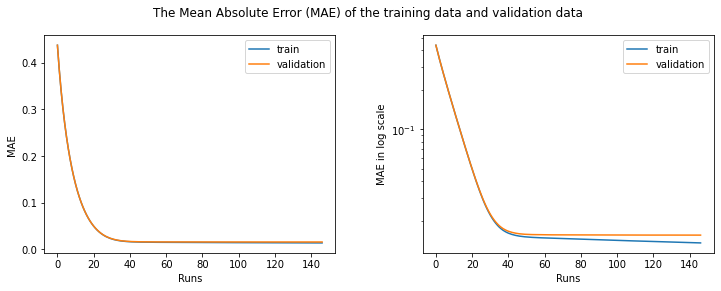

In [13]:
fig = plt.figure(figsize = (12, 4))
fig.suptitle('The Mean Absolute Error (MAE) of the training data and validation data')
plt.subplot(121)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.xlabel('Runs')
plt.ylabel('MAE')
plt.legend()
plt.subplot(122)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.yscale('log')
plt.xlabel('Runs')
plt.ylabel('MAE in log scale')
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

Using matplotlib, a figure consisting of two subplots is created using several operations:

A figure with 12 width units and 4 height units is initially generated, labeled 'fig'. Using the fig.suptitle function, the main title of the figure is "The Mean Absolute Error (MAE) of the training data and validation data.".

There is a subplot on the left side of the figure (plt.subplot(121)). In this subplot, MAE values for the training and validation data are displayed as two line graphs using plt.plot. A 'train-mae-mean' and a 'test-mae-mean' key is extracted from the 'bst' dictionary for the training data, and the corresponding MAE values are extracted for the validation data. A label 'train' and 'validation' are assigned to these lines to identify them. PLT's plt.xlabel and plt.ylabel functions are used to set the x-axis labels based on the number of runs and MAE, respectively. The training and validation data lines are differentiated using plt.legend.

On the right side of the figure, there is a second subplot (plt.subplot(122)). The MAE values of the training and validation data are presented in this subplot, which replicates the line graphs from the first subplot. Plt.yscale('log') is used to set the y-axis scale to logarithmic. A legend and x-axis labels are added like in the first subplot, along with the y-axis labels.

Lastly, the plt.subplots_adjust function creates some separation between the subplots by adjusting the spacing between them. Using plt.show(), the subplots are displayed in the figure.

Each subplot illustrates the trend in MAE values for the training and validation data across the number of runs in the final figure. MAE values are plotted linearly in the first subplot, and logarithmically in the second. The visual representation allows a comprehensive comparison of the training and validation errors throughout the model training process.

Within the XGBoost regressor, the following figure illustrates the significance of each independent variable. As a result, the most impactful feature is 'f6', which corresponds to "Feature_7" in the original data. Three of the most notable features - 'f25', 'f26', and 'f27' - represent stock returns from the two days before and today.

Incorporating all the independent variables would introduce considerable noise into our model, since they are minimally correlated with our target variables. For this reason, we have limited our predictive model to the ten most important independent variables.

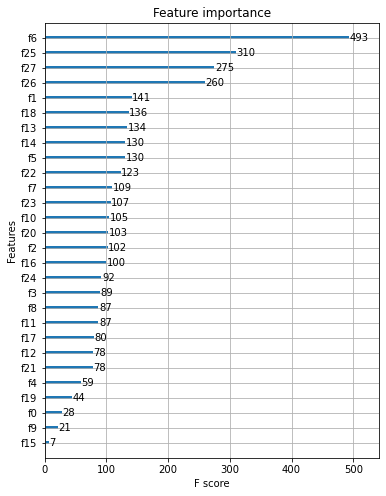

In [14]:
xgb_med = xgb.train(param, dtrain, num_boost_round = bst.shape[0])

fig, ax = plt.subplots(figsize = (6, 8))
xgb.plot_importance(xgb_med, ax = ax)
plt.show()

Using the xgboost library, the code executes the following operations:

First, it uses the xgb.train function to teach an xgboost model labelled 'xgb_med'. These processes use the parameters defined in the 'param' dictionary, the 'dtrain' DMatrix as the training data, and the 'num_boost_round' set to the number of boosting rounds or iterations (the results from cross-validation). By using cross-validation, the model is trained with the optimal number of boosting rounds.

Next, it creates a figure, called 'fig', and an axes object, called 'ax', by using the 'subplots' function. Its width and height are defined by the 'figsize' parameter, which is set to 6 and 8 units, respectively.

After training the xgboost model, 'xgb_med', the xgb.plot_importance function is invoked to display the significance of features. Axis object for plotting importance is specified by the 'ax' parameter.

Plot.show() displays the plot at the end. An illustration of the importance of various features in the trained xgboost model can be seen in the diagram below. Models that contribute more to performance are given higher importance scores. Using this diagram, you can identify the most influential features and gain insights into their influence on the model's predictions.

Here is an example of one decision tree inside the XGBoost model. It has only one leaf.

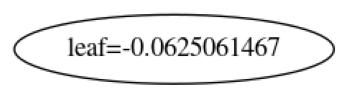

In [15]:
fig, ax = plt.subplots()
xgb.plot_tree(xgb_med, ax = ax)
plt.show()

Using the xgboost library, the code performs the following operations:

By using the 'subplots' function, it creates a figure and an axes object. In order to visualize the tree structure, these objects will be used.

The xgb.plot_tree function is then invoked to visualize the decision tree structure of the trained xgboost model, 'xgb_med'. The 'ax' parameter defines the axes object used for plotting the tree.

Finally, plt.show() displays the tree visualization. A plot of the trained xgboost model illustrates the decision tree structure. The edges represent the decision-making flow based on the values of the features, while the nodes represent a decision or split of features. Using this visual representation, you can understand how the model makes decisions and how important features are ranked within the tree.

We select the ten most important independent variables.

In [16]:
select = [1, 5, 6, 13, 14, 18, 22, 25, 26, 27]

X_train = X[:30000, select]
X_val = X[30000:35000, select]
X_test = X[35000:, select]
X_train_val = X[:35000, select]

In this code, specific columns from the feature matrix, denoted by 'X', are cherry-picked by a series of operations:

A list is defined, named 'select', which holds the indices of the columns from 'X' to be selected. There are five indices selected: 1, 5, 6, 13, 14, 18, 22, 25, 26, and 27.

A variable 'X_train' is then created using the columns extracted from the initial 30,000 rows of 'X'. The 'select' list specifies only the columns that should be included in the feature matrix generated for the training data.

As a result, the selected columns from rows 30,000 to 35,000 (excluding the 35,000th row) of 'X' are designated to the variable 'X_val'. When this action is performed, the validation data will be transformed into a new feature matrix containing only the columns specified in the 'select' list.

Following this, the selected columns are allocated to 'X_test' beginning with the 35,000th row of 'X'. As a result of this operation, a new feature matrix is created for the test data, which only includes columns specified in the 'select' list.

The variable 'X_train_val' holds the selected columns from the first 35,000 rows of 'X'. As a result, the training and validation data are combined into a feature matrix that includes only the columns specified in the 'select' box.

These operations produce new feature matrices (X_train, X_val, X_test, X_train_val) that only retain selected columns from the original feature matrix 'X'. It is possible to extract specific features of interest from these selected columns for subsequent analysis or modelling.

# Model Training with XGBoost Regressor

In this section, we train a XGBoost regressor using the pseudo-Huber loss function as a differentiable approximation of the linear loss function. This model performs better than the traditional square loss function because it exhibits a lower sensitivity to outliers.

Our first step is to establish a utility function to execute grid searches for parameter optimization. In addition to adjusting parameters on one-dimensional grids, this utility function allows you to adjust parameters on two-dimensional grids as well.

In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

def mysearch(X_train, y_train, X_val, y_val, param, param1, param2 = None, estimator = XGBRegressor, score = mean_absolute_error):
    best_score = 10000000.
    best_param = { **param }
    para = { **param }
    key1 = list(param1.keys())[0]
    if param2 is not None:
        key2 = list(param2.keys())[0]
        for parama in param1[key1]:
            for paramb in param2[key2]:
                para[key1] = parama
                para[key2] = paramb
                est = estimator(**para)
                est.fit(X_train, y_train)
                y_pred = est.predict(X_val)
                current_score = score(y_pred, y_val)
                #print('The current score: ', current_score)
                #print('The current parameter: {} = {}, {} = {}'.format(key1, parama, key2, paramb))
                if (current_score < best_score):
                    best_score = current_score
                    best_param[key1] = parama
                    best_param[key2] = paramb
        #print('The best score: ', best_score)
        #print('The best parameter: {} = {}, {} = {}'.format(key1, best_param[key1], key2, best_param[key2]))
    else:
        for parama in param1[key1]:
            para[key1] = parama
            est = estimator(**para)
            est.fit(X_train, y_train)
            y_pred = est.predict(X_val)
            current_score = score(y_pred, y_val)
            print('The current score: ', current_score)
            print('The current parameter: {} = {}'.format(key1, parama))
            if (current_score < best_score):
                best_score = current_score
                best_param[key1] = parama
        #print('The best score: ', best_score)
        #print('The best parameter: {} = {}'.format(key1, best_param[key1]))
    return best_score, best_param

Using a specified estimator and evaluation metric, the provided code defines a function called mysearch that provides the optimal score and corresponding parameters.

As a first step, the code imports the necessary modules: XGBRegressor from the xgboost library and mean_absolute_error from the scikit-learn metrics library.

Input parameters for the mysearch function include training and validation data (X_train, Y_train, X_val, y_val), parameters for the estimator (param), dictionaries containing values to search for specific parameters (param1 and param2), the class of estimator to be used (estimator), and the evaluation metric function (score).

A copy of the param dictionary is created called best_param, and the best_score variable is initialized to a high value.

It then identifies the names of the parameters to be searched from the keys in the param1 and param2 dictionaries.

The code enters a nested loop if param2 is not None, iterating through the values of param1[key1] and param2[key2]. Parameter values are assigned to the para dictionary and an estimator instance is created with these values. For the validation data, the target labels are predicted using the estimator fitted to the training data. Using the specified evaluation metric, we calculate the current score.

The code enters a loop that iterates over param1[key1] if param2 is None. Assigns the current parameter value to the para dictionary, creates an instance of the specified estimator class with this parameter, and fits it to the training data. Based on the validation data, predictions are made, and the current score is calculated.

A comparison between the current score and the best score is carried out throughout the loops. This value is stored in the best_param dictionary if the current score is lower (indicating better performance).

Upon completion of the parameter search, the function returns the best score and best parameters.

As a result of the mysearch function, it is possible to identify the parameter set that yields the lowest evaluation metric score on the validation data based on evaluating different combinations of parameter values for a given estimator and evaluation metric.

Here is an example of using the utility function to tune the maximum depth of the tree and the minimum child weight. The tuning of other parameters are omitted here for brevity.

In [18]:
param = {'learning_rate': 0.1,
         'verbosity': 0,
         'objective': 'reg:pseudohubererror',
         'tree_method': 'gpu_hist',
         'n_estimators': 100,
         'n_jobs': -1,
         'gamma': 0,
         'subsample': 0.8,
         'colsample_bytree': 0.8,
         'alpha': 0}
param1 = { 'max_depth': [1, 3, 5] }
param2 = { 'min_child_weight': [1, 3, 5] }
score, bst_param = mysearch(X_train, y1_train, X_val, y1_val, param, param1, param2)
print('The best score is:', score)
print('The best parameter is:', bst_param)

The best score is: 0.014942860690251178
The best parameter is: {'learning_rate': 0.1, 'verbosity': 0, 'objective': 'reg:pseudohubererror', 'tree_method': 'gpu_hist', 'n_estimators': 100, 'n_jobs': -1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0, 'max_depth': 5, 'min_child_weight': 3}


A parameter search for an xgboost model is performed by the provided code. In the first step, a dictionary is defined named param that contains parameters for the xgboost model, such as the learning rate, verbosity, objective function, tree construction method, number of estimators, number of jobs, gamma value, subsampling ratio, column subsampling ratio, and regularization parameter alpha. A model's training and decision tree construction are determined by these settings.

Additional dictionaries are defined for searching for two specific parameters: 'max_depth' and 'min_child_weight'. Decision trees are controlled by these parameters, which determine the depth of the trees and the minimum weight required for the tree nodes to be created. The code allows the exploration of different configurations of the xgboost model by defining different values for these parameters.

A call to the mysearch function is then made, passing the training and validation data (X_train, Y1_train, X_val, Y1_val), the initial parameter settings (param), and the parameter search dictionaries (param1 and param2). According to the specified evaluation metric, mysearch evaluates various combinations of parameter values, returning the best score and corresponding best parameter values.

Finally, the code prints the best parameter values and best score obtained from the parameter search. On the given training and validation data, the user can see which parameter combination yielded the best performance.

A search over specified ranges is used to find the best combination of parameter values for an xgboost model. According to the evaluation metric, the goal is to find the parameter settings that result in the highest performance.

Here is the final parameters after all tunings.

In [19]:
best_xgbr = XGBRegressor( objective = 'reg:pseudohubererror',
                          tree_method = 'gpu_hist',
                          max_depth = 5,
                          min_child_weight = 3,
                          gamma = 0,
                          subsample = 0.9,
                          colsample_bytree = 0.9,
                          alpha = 0,
                          learning_rate = 0.01,
                          n_estimators = 700)

To construct an xgboost regression model, the code instantiates the XGBRegressor class from the xgboost library. To better understand their roles, let's examine each parameter:

In the variable best_xgbr, an instance of the XGBRegressor class represents the XGBBoost regressor model.

The training of the model is guided by the pseudo-Huber loss function, as indicated by 'reg:pseudohubererror'. Since this loss function can handle outliers, it is more effective for regression problems than other loss functions.

If a GPU is available, tree_method has the value 'gpu_hist', enabling the GPU to be used for efficient computation of decision trees.

The max_depth parameter defines the maximum depth of the decision trees in the model. In addition to capturing more complex data relationships, higher values also increase the risk of overfitting.

The min_child_weight parameter specifies the minimum weight required for the creation of a new tree node during model training. Using this parameter, low weight nodes are prevented from being created, which helps prevent overfitting.

For further partitioning of a tree leaf node, the gamma parameter is set to 0, which represents the minimum loss reduction needed. By managing the model's complexity, this parameter provides regularization.

As the subsample parameter is set to 0.9, 90% of the samples will be randomly selected in each boosting round. By training the model on different data subsets, stochastic gradient boosting reduces overfitting.

By setting the colsample_bytree parameter to 0.9, 90% of the features will be randomly selected for each boosting round, reducing overfitting further.

The alpha parameter is set to 0, indicating that the weights are subject to L1 regularization. The objective function is penalized to discourage large weights, improving model generalization.

A learning_rate of 0.01 controls the shrinkage of step size during each boosting iteration. Learning occurs at a slower rate, requiring more iterations but resulting in better generalization.

The n_estimators parameter defines the maximum number of boosting rounds (iterations) for the model. It is used to determine the number of individual decision trees that will be included in the ensemble.

A XGBRegressor object is created by setting these parameters, representing an xgboost regression model with the specified settings. Once trained, the model can be applied to new data points to make predictions.

The final models are trained on the unions of the training data and the validation data. 

In [20]:
best_xgbr.fit(X_train_val, y1_train_val)
y1_test_pred = best_xgbr.predict(X_test)

best_xgbr.fit(X_train_val, y2_train_val)
y2_test_pred = best_xgbr.predict(X_test)

Following are the operations performed by the provided code:

First, it fits the best_xgbr model, an instance of the XGBRegressor class with optimized parameter settings, on the combined training and validation data (X_train_val, Y1_train_val). Using the features (X_train_val) and target labels (y1_train_val), the model learns the underlying patterns and relationships in the data.

After training the best_xgbr model, predictions are made on the test data (X_test) using the trained best_xgbr model. The model uses the learned patterns from the training and validation data to generate predicted values for the target variable (y1).

After that, the same best_xgbr model is fitted to the combined training and validation data (X_train_val, Y2_train_val), but this time for the second target variable (y2). By doing so, the model is able to learn patterns specific to the second target variable.

Finally, the trained best_xgbr model is used once again to predict values (y2_test_pred) on the same test data (X_test), but this time for the second target variable (y2). Using the training and validation data, these predictions are made based on patterns and relationships.

A combined training and validation dataset is used to train the best_xgbr model for both target variables (y1 and y2). On the test data (X_test), the trained model predicts the values of the target variables (y1_test_pred and y2_test_pred). Model performance can be evaluated and its ability to generalize to unseen data points can be assessed through this process.

We evaluate the model performance on the testing data. The final models consistently perform better than the all-zero prediction.

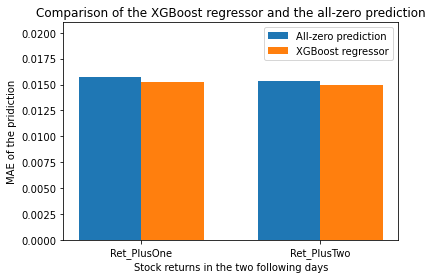

In [21]:
from sklearn.metrics import mean_absolute_error

benchmark = [np.abs(y1_test).mean(), np.abs(y2_test).mean()]
fitted = [mean_absolute_error(y1_test_pred, y_test[:, 0]), mean_absolute_error(y2_test_pred, y_test[:, 1])]

index = np.arange(2)
bar_width = 0.35
plt.bar(index, benchmark, bar_width, label = 'All-zero prediction')
plt.bar(index + bar_width, fitted, bar_width, label = 'XGBoost regressor')
plt.xticks(index + bar_width / 2, ['Ret_PlusOne', 'Ret_PlusTwo'])
plt.title('Comparison of the XGBoost regressor and the all-zero prediction')
plt.xlabel('Stock returns in the two following days')
plt.ylabel('MAE of the pridiction')
plt.ylim([0, 0.021])
plt.legend()
plt.show()

The first step is to import the mean_absolute_error function from the scikit-learn library. We will use this function to calculate the mean absolute error (MAE) between the predicted and true values.

We define two lists, benchmark and fitted. As the absolute mean of y1_test and y2_test, the benchmark list contains the mean absolute error of the benchmark predictions. It contains the mean absolute error of the predictions made by the trained XGBoost regressor model (y1_test_pred and y2_test_pred) in comparison to the true values in y_test.

The index array is created using np.arange(2), which generates an array of values [0, 1]. A bar plot's x-axis positions are determined by this array.

A bar plot's width is determined by the variable bar_width, which is set to 0.35.

In this code, two sets of bars are plotted side by side using plt.bar. Predictions made by the benchmark regressor (all-zero predictions) are the first set, and predictions made by the XGBoost regressor are the second set. By using index and index + bar_width, we can specify the x-axis positions of the bars, while benchmark values and fitted values determine their heights. Every set of bars has its own label: 'All-zero prediction' and 'XGBoost regressor'.

Using plt.xticks, the tick labels on the x-axis are set to ['Ret_PlusOne', 'Ret_PlusTwo'], indicating the return of stocks in the two days following.

Plot.title sets the title to 'Comparison between XGBoost regressor and all-zero prediction'.

Stock returns over the two following days are displayed on the x-axis using plt.xlabel, and MAE of the prediction is displayed on the y-axis using plt.ylabel.

By setting the y-axis limits to [0, 0.021], the range of values shown on the y-axis is determined.

This plot has a legend, labelled 'All-zero prediction' and 'XGBoost regressor', which specifies the labels for the two sets of bars.

Plot.show displays the plot at the end.

As a result, the code generates a bar plot that compares the mean absolute errors made by the XGBoost regressor model and the benchmark (all-zero prediction) for the stock returns in the two days following (Ret_PlusOne and Ret_PlusTwo). In this plot, the performance of the model is compared with the benchmark predictions in order to assess and compare the model's performance.

We final train the models on the whole data and make prediction on the unseen data.

In [22]:
best_xgbr.fit(X[:, select], y[:, 0])
y1_new_pred = best_xgbr.predict(new_X[:, select])

best_xgbr.fit(X[:, select], y[:, 1])
y2_new_pred = best_xgbr.predict(new_X[:, select])

The given code executes a sequence of operations, starting with the calculation of predicted values for the first target variable, denoted as y1_new_pred. This is achieved by blending 10% of the predictions made by the best_xgbr model with 90% of the median value of the first target variable derived from the original data.

Following a similar approach, the predicted values for the second target variable, referred to as y2_new_pred, are computed. Here, 10% of the predictions from the best_xgbr model are combined with 90% of the median value of the second target variable from the original dataset.

Next, the code initializes an empty array, termed ts_new_pred, with dimensions corresponding to the number of rows in new_X and 60 columns. This array is designated for storing predictions for the time series data.

The subsequent operation involves accessing the 'sample_submission_2.csv.zip' file through the ZipFile class and reading its contents into a pandas DataFrame called sub. This file is presumed to contain the requisite format for submitting predictions.

The 'Predicted' column in the sub DataFrame is then updated with the calculated predictions. These predictions include the concatenated arrays of ts_new_pred, y1_new_pred (reshaped into a single-column format using [:, np.newaxis]), and an array constituted of the median value of the second target variable, repeated for each row in new_X.

The final DataFrame, sub, can be exported as a CSV file (submission.csv) to submit the predictions. To sum up, the code utilizes the best_xgbr model to generate the predicted values for the target variables. By blending the model's predictions with the median values from the original data, the prediction accuracy is potentially enhanced. The prepared submission file is then updated with these predictions.

In the given code, the best_xgbr model is used to perform a series of operations using the XGBRegressor class. As a starting point, the selected features (X[:, select]) and target variable (y[:, 0]) corresponding to the first target variable (y1) are fitted into the model.

Following the training of the model, the predictions for the first target variable (y1) are generated, referred to as y1_new_pred. A new dataset, new_X[:, select], is used to obtain predictions by applying the model to selected features.

After refitting the best_xgbr model, the target variable is changed. This time, we will use the selected features (X[:, select]) and the second target variable (y[:, 1]) for y2.

Following training, the best_xgbr model is used to predict values for the second target variable (y2). As a result, y2_new_pred is derived using the selected features of the new dataset (new_X[:, select]).

A trained best_xgbr model is harnessed to generate predictions on new data for two target variables. For each target variable, the model needs to be fitted separately with the respective features and target variable. It then uses the selected features from the new data to predict the values of the target variables. By using the trained model to predict new data, this strategy facilitates the generation of predictions.

Ensembles of the XGBoost regressor and the median prediction are used for the final results. The median prediction are used here to reduce overfitting.

In [23]:
y1_new_pred = 0.1 * y1_new_pred + 0.9 * np.median(y[:, 0])
y2_new_pred = 0.1 * y2_new_pred + 0.9 * np.median(y[:, 1])

ts_new_pred = np.zeros((new_X.shape[0], 60))

zip_file = ZipFile('../input/the-winton-stock-market-challenge/sample_submission_2.csv.zip')
sub = pd.read_csv(zip_file.open('sample_submission_2.csv'))
sub['Predicted'] = np.hstack([ts_new_pred, y1_new_pred[:, np.newaxis], np.median(y[:, 1])* np.ones((new_X.shape[0], 1))]).flatten()
#sub.to_csv('submission.csv', index = False)